In [2]:
import cv2
import os
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import pickle

In [3]:
train_df = pd.read_csv('TrainData.csv')
test_df = pd.read_csv('TestData.csv')

In [5]:
le = LabelEncoder()
train_df['Asana'] = le.fit_transform(train_df['Asana'])
test_df['Asana'] = le.transform(test_df['Asana'])

In [6]:
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values

X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

In [9]:
X_train.shape

(47968, 91)

In [12]:
y_test.shape

(13711,)

In [11]:
X_test

array([[0.22343134, 1.77147069, 1.37012196, ..., 0.11809258, 0.30801897,
        0.31828313],
       [0.2095581 , 1.76416993, 1.37742273, ..., 0.12396243, 0.3170955 ,
        0.26640079],
       [0.18887909, 1.61764532, 1.52394734, ..., 0.48978247, 0.72941899,
        0.2755173 ],
       ...,
       [0.24492502, 2.51620804, 0.62538462, ..., 1.72048862, 1.42689006,
        0.29383885],
       [0.25650551, 2.57892358, 0.56266908, ..., 1.52114311, 1.27895823,
        0.24241271],
       [0.26500788, 2.53500177, 0.60659088, ..., 1.5933775 , 1.36045055,
        0.23390316]])

In [13]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:", label_mapping)

Label mapping: {'Bhujangasana': 0, 'JanuSirasana': 1, 'Padmasana': 2, 'Savasana': 3, 'Tadasana': 4, 'Trikonasana': 5}


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

In [16]:
print("Start")
classifier=StackingClassifier( estimators = [('knn',KNeighborsClassifier()),
                                             ('rf',RandomForestClassifier(class_weight='balanced', n_estimators = 200, criterion = 'gini'))
                                            ] ).fit(X_train, y_train)
print("Model trained")
# Predicting the Test set results

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.7f}'.format(accuracy))

Start


c:\Users\nikhi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model trained
Accuracy: 0.9596674


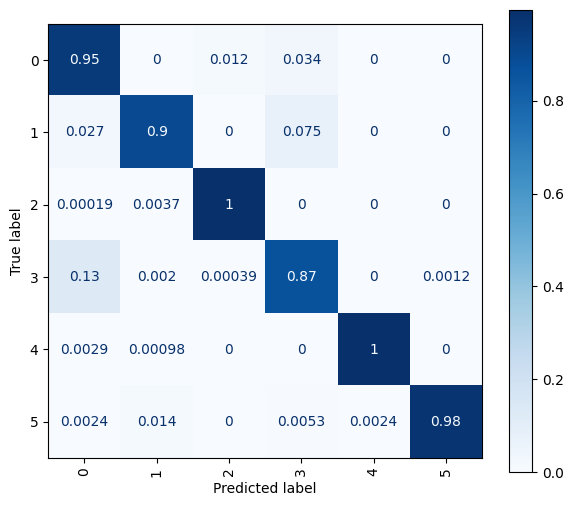

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7,6))
plt.grid(False)
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, normalize='true', cmap='Blues', ax=ax, xticks_rotation='vertical')
plt.show()
print()

In [19]:
filename = 'classifier.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [20]:

print("start")
kNN=KNeighborsClassifier().fit(X_train,y_train)
print("Model trained")
# Predicting the Test set results

y_pred = kNN.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.7f}'.format(accuracy))

start
Model trained
Accuracy: 0.9232733


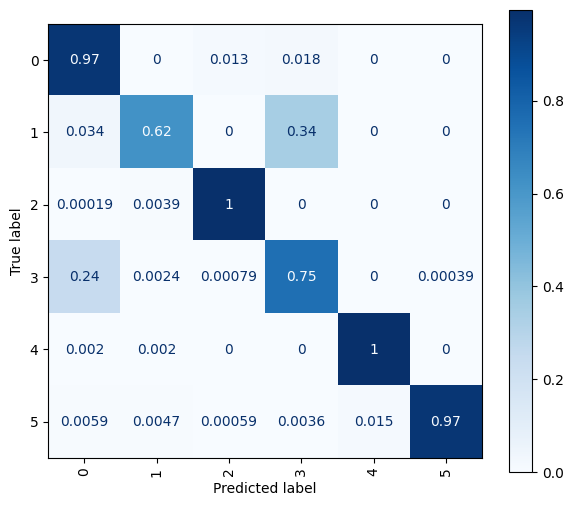

In [21]:
fig, ax = plt.subplots(figsize=(7,6))
plt.grid(False)
ConfusionMatrixDisplay.from_estimator(kNN, X_test, y_test, normalize='true', cmap='Blues', ax=ax, xticks_rotation='vertical')
plt.show()
print()  

In [22]:
filename = 'kNN.sav'
pickle.dump(kNN, open(filename, 'wb'))

print('Models saved successfully')

Models saved successfully


In [23]:
import pickle

# Load the saved kNN model
loaded_model = pickle.load(open('kNN.sav', 'rb'))

# Access the class labels from the loaded model
class_labels = loaded_model.classes_

# Display class labels and their corresponding indices
for idx, label in enumerate(class_labels):
    print(f"Class {idx}: {label}")


Class 0: 0
Class 1: 1
Class 2: 2
Class 3: 3
Class 4: 4
Class 5: 5
